Predicción de la potabilidad del agua.

https://www.kaggle.com/code/elemam/water-quality-and-potability-with-85/input


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import time
from sklearn.preprocessing import  StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from sklearn import metrics #import mean_absolute_error, explained_variance_score
from sklearn import preprocessing
import tensorflow as tf
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Flatten
import missingno as msno
from sklearn.preprocessing import LabelEncoder

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

#Descargando dataset desde Kaggle  ⏰

In [2]:
 !pip install -q kaggle

In [3]:
from google.colab import files
files.upload()         # expire any previous token(s) and upload recreated token

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bevins93","key":"046cc3c4f0ff5b8f68f895725bb4c771"}'}

In [4]:
!rm -r ~/.kaggle

rm: cannot remove '/root/.kaggle': No such file or directory


In [5]:
!mkdir ~/.kaggle

In [6]:
!mv ./kaggle.json ~/.kaggle/

In [7]:
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d adityakadiwal/water-potability

  0% 0.00/251k [00:00<?, ?B/s]
100% 251k/251k [00:00<00:00, 111MB/s]


In [9]:
import os
from shutil import rmtree

!mkdir '/content/AguaPotable/'

In [10]:
! unzip /content/water-potability.zip -d '/content/AguaPotable/'

Archive:  /content/water-potability.zip
  inflating: /content/AguaPotable/water_potability.csv  


#Dataset  ⛲

In [60]:
import xlrd
df = pd.read_csv('/content/AguaPotable/water_potability.csv')

In [61]:
df.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [62]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [63]:
df.shape

(3276, 10)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [65]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [66]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

<Axes: >

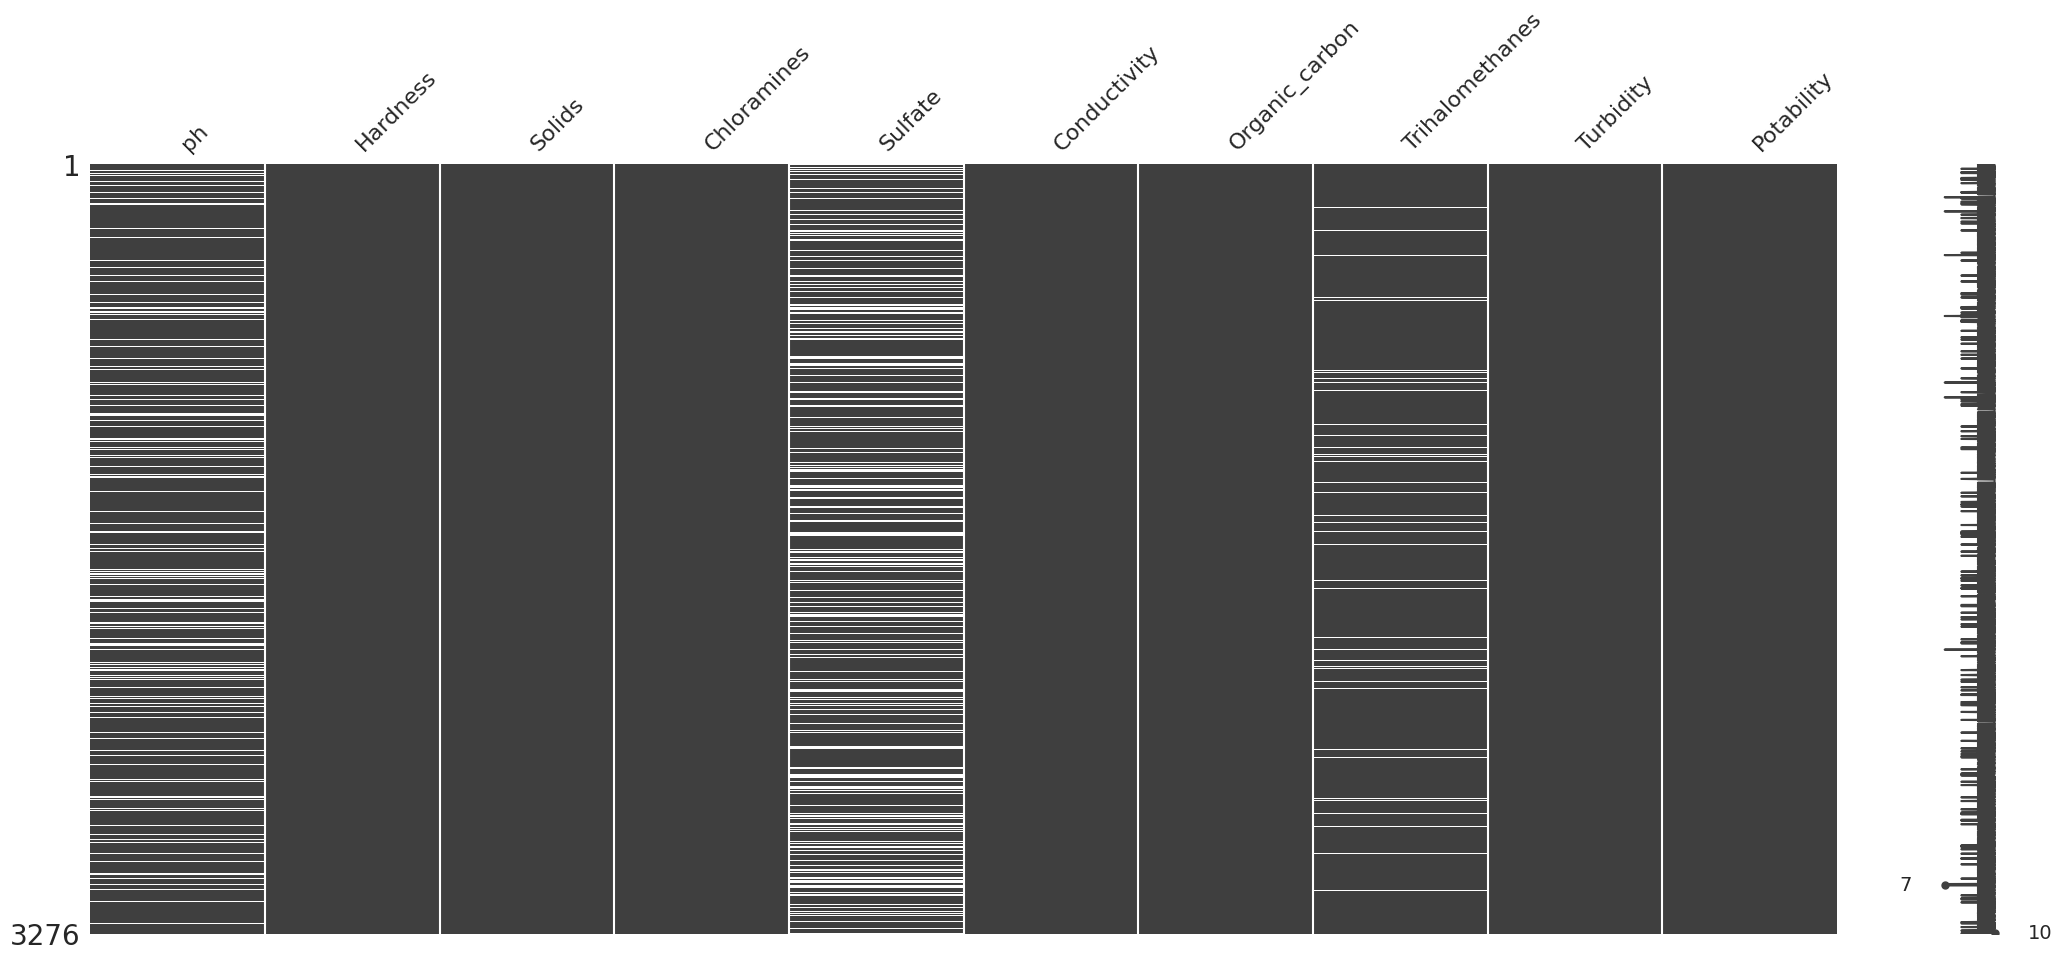

In [67]:
msno.matrix(df)

In [68]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


##Buscando valores faltantes ⚠

In [69]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

###Imputacion de valores faltantes

In [70]:
imputer = SimpleImputer( missing_values = np.nan, strategy = 'mean' )
df_imp = pd.DataFrame(imputer.fit_transform( df ), columns= df.columns)

In [71]:
df_imp.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
# OPCION B: Eliminar los registros con valores faltantes
#df.dropna(inplace=True)
#df.shape

## Buscando valores duplicados

In [72]:
print(f'Tamanio del set antes de eliminar las filas repetidas: {df.shape}')
df.drop_duplicates(inplace=True)
print(f'Tamanio del set despues de eliminar las filas repetidas: {df.shape}')

Tamanio del set antes de eliminar las filas repetidas: (3276, 10)
Tamanio del set despues de eliminar las filas repetidas: (3276, 10)


In [73]:
from sklearn.preprocessing   import OneHotEncoder,LabelEncoder

##Análisis univariado

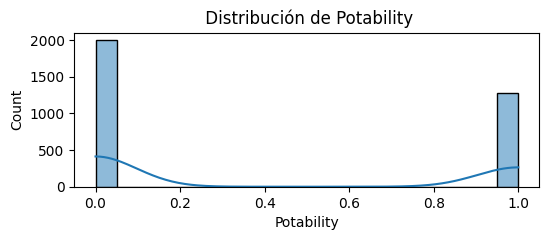

In [26]:
# Plot histograms for numerical variables
numeric_cols = df.select_dtypes(include=['int64']).columns
for col in numeric_cols:
    plt.figure(figsize=(6, 2))
    sns.histplot(data=df, x=col, kde=True, bins=20)
    plt.title(f' Distribución de {col}')
    plt.show()

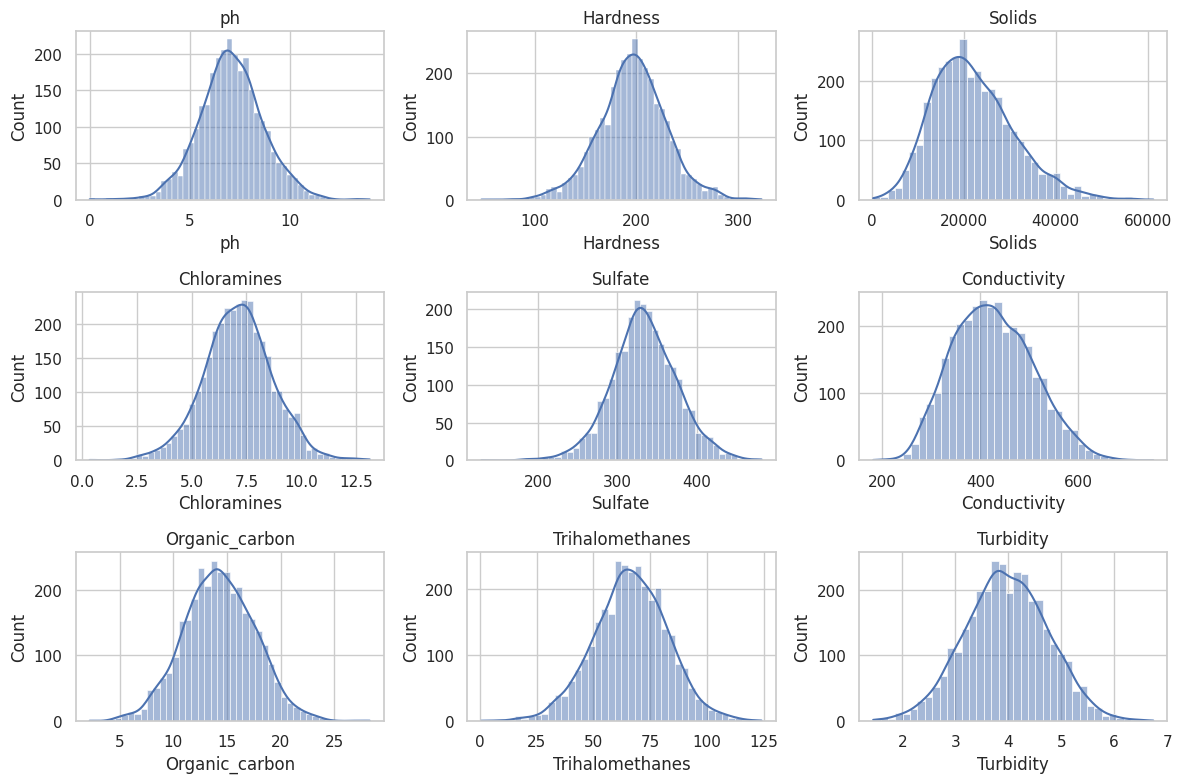

In [76]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

numerical_columns = df.drop("Potability", axis=1).columns

for column in numerical_columns:
    plt.subplot(3, 3, numerical_columns.get_loc(column) + 1)
    sns.histplot(df[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

##Análisis bivariado

In [77]:
#import plotly.express as px

# Set the Seaborn style
sns.set_style("whitegrid")

# Pairplot of Features by Potability
sns.pairplot(data=df_imp, hue='Potability', palette='Set1')
plt.suptitle('Pairplot of Features by Potability', y=1.02)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

##Correlación

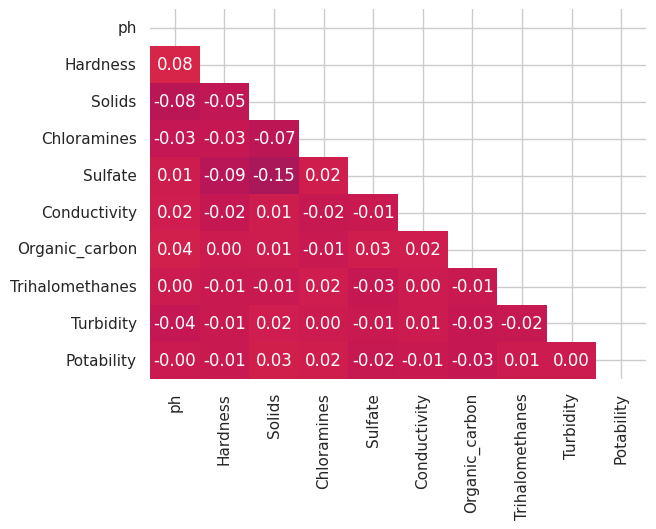

In [78]:
# Correlation Matrix
corr_matrix=df_imp.select_dtypes(np.number).corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, mask=mask, vmin=-1, vmax=1, fmt=".2f", cbar=False)

plt.show()

##Buscando outliers

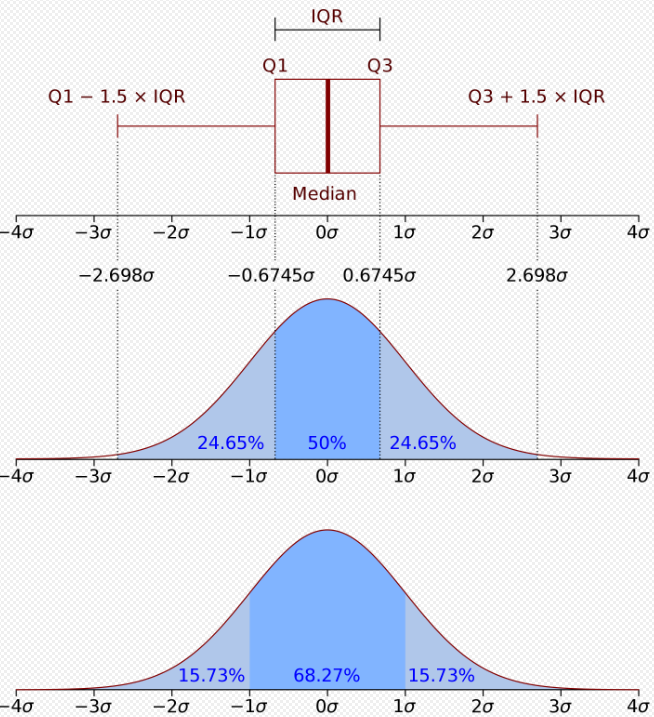

In [29]:
for col in (df_imp.columns):

    Q1 = df_imp[col].quantile(0.25)
    Q2 = df_imp[col].quantile(0.5)
    Q3 = df_imp[col].quantile(0.75)
    IQR = Q3-Q1
    #if(df_imp[col].min() < Q2-3*df_imp[col].std() or df_imp[col].max() > Q2+3*df_imp[col].std()):
    if(df_imp[col].min() < Q1-1.5*IQR or df_imp[col].max() > Q3+1.5*IQR):
        print(f"  Columna con outliers = {col}   <---")
    else:
      print(f"Columna SIN outliers = {col}")

  Columna con outliers = ph   <---
  Columna con outliers = Hardness   <---
  Columna con outliers = Solids   <---
  Columna con outliers = Chloramines   <---
  Columna con outliers = Sulfate   <---
  Columna con outliers = Conductivity   <---
  Columna con outliers = Organic_carbon   <---
  Columna con outliers = Trihalomethanes   <---
  Columna con outliers = Turbidity   <---
Columna SIN outliers = Potability


Boxplot for ph


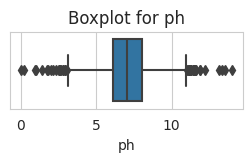

**************************************************
Boxplot for Hardness


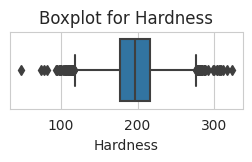

**************************************************
Boxplot for Solids


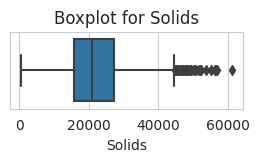

**************************************************
Boxplot for Chloramines


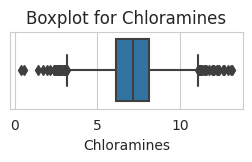

**************************************************
Boxplot for Sulfate


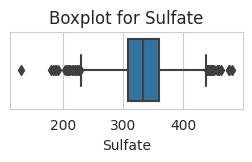

**************************************************
Boxplot for Conductivity


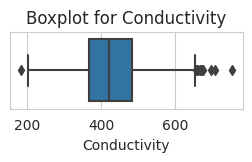

**************************************************
Boxplot for Organic_carbon


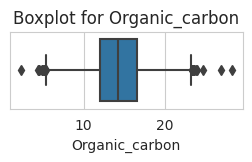

**************************************************
Boxplot for Trihalomethanes


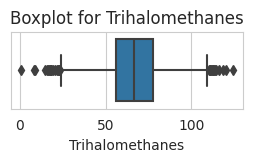

**************************************************
Boxplot for Turbidity


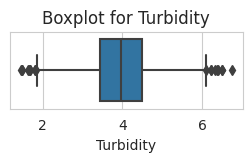

**************************************************
Boxplot for Potability


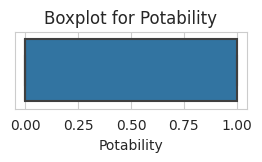

**************************************************


In [30]:
# Boxplot
numeric_columns = df_imp.select_dtypes(np.number).columns.tolist()
for column in numeric_columns:
    print(f"Boxplot for {column}")
    plt.figure(figsize=(3, 1))
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot for {column}")
    plt.show()
    print("*" * 50)

##Eliminando outliers

In [85]:
X_copia = df

In [32]:
# Eliminando outliers de ph
col = 'ph'

Q1 = df_imp[col].quantile(0.25)
Q2 = df_imp[col].quantile(0.5)
Q3 = df_imp[col].quantile(0.75)
IQR = Q3-Q1

X_copia =  df_imp[df_imp[col]  > Q1-1.5*IQR ]
X_copia = X_copia[X_copia[col] < Q3+1.5*IQR ]

In [33]:
# Eliminando outliers de Hardness
col = 'Hardness'

Q1 = X_copia[col].quantile(0.25)
Q2 = X_copia[col].quantile(0.5)
Q3 = X_copia[col].quantile(0.75)
IQR = Q3-Q1

X_copia =  X_copia[X_copia[col]  > Q1-1.5*IQR ]
X_copia = X_copia[X_copia[col] < Q3+1.5*IQR ]

In [34]:
# Eliminando outliers de Solids
col = 'Solids'

Q1 = X_copia[col].quantile(0.25)
Q2 = X_copia[col].quantile(0.5)
Q3 = X_copia[col].quantile(0.75)
IQR = Q3-Q1

X_copia =  X_copia[X_copia[col]  > Q1-1.5*IQR ]
X_copia = X_copia[X_copia[col] < Q3+1.5*IQR ]

In [35]:
# Eliminando outliers de Chloramines
col = 'Chloramines'

Q1 = X_copia[col].quantile(0.25)
Q2 = X_copia[col].quantile(0.5)
Q3 = X_copia[col].quantile(0.75)
IQR = Q3-Q1

X_copia =  X_copia[X_copia[col]  > Q1-1.5*IQR ]
X_copia = X_copia[X_copia[col] < Q3+1.5*IQR ]

In [36]:
# Eliminando outliers de Sulfate
col = 'Sulfate'

Q1 = X_copia[col].quantile(0.25)
Q2 = X_copia[col].quantile(0.5)
Q3 = X_copia[col].quantile(0.75)
IQR = Q3-Q1

X_copia =  X_copia[X_copia[col]  > Q1-1.5*IQR ]
X_copia = X_copia[X_copia[col] < Q3+1.5*IQR ]

In [37]:
# Eliminando outliers de Conductivity
col = 'Conductivity'

Q1 = X_copia[col].quantile(0.25)
Q2 = X_copia[col].quantile(0.5)
Q3 = X_copia[col].quantile(0.75)
IQR = Q3-Q1

X_copia =  X_copia[X_copia[col]  > Q1-1.5*IQR ]
X_copia = X_copia[X_copia[col] < Q3+1.5*IQR ]

In [38]:
# Eliminando outliers de Organic_carbon
col = 'Organic_carbon'

Q1 = X_copia[col].quantile(0.25)
Q2 = X_copia[col].quantile(0.5)
Q3 = X_copia[col].quantile(0.75)
IQR = Q3-Q1

X_copia =  X_copia[X_copia[col]  > Q1-1.5*IQR ]
X_copia = X_copia[X_copia[col] < Q3+1.5*IQR ]

In [39]:
# Eliminando outliers de Trihalomethanes
col = 'Trihalomethanes'

Q1 = X_copia[col].quantile(0.25)
Q2 = X_copia[col].quantile(0.5)
Q3 = X_copia[col].quantile(0.75)
IQR = Q3-Q1

X_copia =  X_copia[X_copia[col]  > Q1-1.5*IQR ]
X_copia = X_copia[X_copia[col] < Q3+1.5*IQR ]

In [40]:
# Eliminando outliers de Turbidity
col = 'Turbidity'

Q1 = X_copia[col].quantile(0.25)
Q2 = X_copia[col].quantile(0.5)
Q3 = X_copia[col].quantile(0.75)
IQR = Q3-Q1

X_copia =  X_copia[X_copia[col]  > Q1-1.5*IQR ]
X_copia = X_copia[X_copia[col] < Q3+1.5*IQR ]

In [86]:
X_copia.shape

(3276, 10)

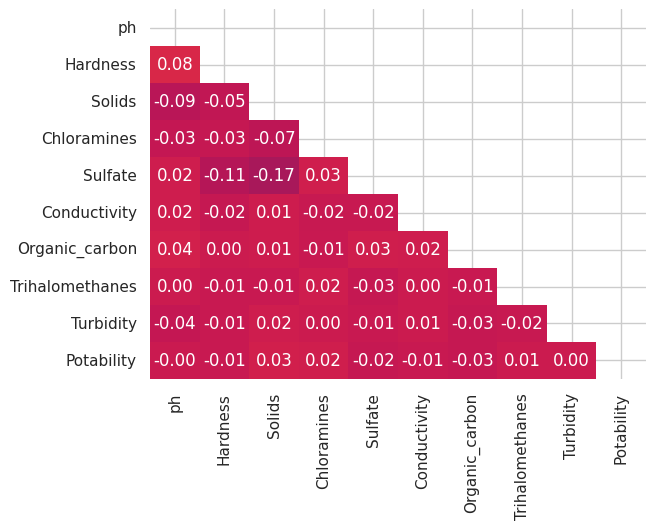

In [87]:
# Correlation Matrix
corr_matrix2=X_copia.select_dtypes(np.number).corr()
mask = np.triu(np.ones_like(corr_matrix2, dtype=bool))
sns.heatmap(corr_matrix2, annot=True, mask=mask, vmin=-1, vmax=1, fmt=".2f", cbar=False)

plt.show()

#Normalizacion de datos


In [88]:
X_copia_robustscaler = preprocessing.RobustScaler().fit_transform(X_copia)
X_copia_robustscaler1 = pd.DataFrame(X_copia_robustscaler, columns=X_copia.columns)

In [89]:
df1 = X_copia_robustscaler1

In [90]:
df1.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,0.198981,-0.011702,0.085492,0.678324,1.227178,-0.854560,0.947683,-0.935210,0.0
1,-1.686498,-1.696382,-0.196962,-0.249088,NaN,1.473406,0.214093,-0.478921,0.514449,0.0
2,0.539556,0.684850,-0.087287,1.079558,NaN,-0.028251,0.590024,-0.009417,-0.847715,0.0
3,0.650092,0.437145,0.093483,0.467446,0.455737,-0.505079,0.939076,1.568850,0.635242,0.0
4,1.043930,-0.398477,-0.252771,-0.293690,-0.438995,-0.202262,-0.592197,-1.610971,0.113188,0.0


In [103]:
df1 = df1.dropna()

#X, y

In [104]:
X = df1[df1.columns[df1.columns != 'Potability']]
y = df1['Potability']

# Modificar el rango de valores  (escalar o estandarizar )



In [105]:
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
3,0.650092,0.437145,0.093483,0.467446,0.455737,-0.505079,0.939076,1.568850,0.635242
4,1.043930,-0.398477,-0.252771,-0.293690,-0.438995,-0.202262,-0.592197,-1.610971,0.113188
5,-0.737778,-0.217352,0.670393,0.208592,-0.122394,-1.218504,-1.295369,-0.544580,-1.315583
6,1.618665,1.283477,0.670481,0.192763,1.159599,-1.191072,-0.095427,0.836604,-1.208776
7,0.812147,0.160582,-0.621952,-1.291740,-0.569634,0.454279,-0.412864,-0.177927,0.420888
...,...,...,...,...,...,...,...,...,...
3267,0.991962,0.454072,-0.429144,-0.419120,-0.385498,-0.271199,-0.961569,-0.537534,0.621167
3268,-0.169736,0.260027,-0.315523,0.290731,-0.546659,-0.798041,0.445020,-1.756106,-0.482784
3269,2.262223,-2.565620,1.393870,1.073159,-1.418985,0.155170,0.435103,-1.166150,0.390565
3270,-0.491188,-0.258900,0.446675,0.310571,0.241656,-0.051681,-0.478805,-0.288586,-0.269011


In [106]:
y

3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
       ... 
3267    1.0
3268    1.0
3269    1.0
3270    1.0
3271    1.0
Name: Potability, Length: 2011, dtype: float64

# Aqui va el codigo de ML

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30 )
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.30)

In [108]:
for lr in [0.0001, 0.001, 0.01, 0.1]:
    for epochs in [100]:
        model =Sequential( name="my_first_NN")
        model.add(Dense( 1, name = 'output', activation = 'sigmoid', input_shape = (X.shape[1],)))

        opt = keras.optimizers.Adam( learning_rate = lr )
        model.compile( optimizer = opt, loss = 'mean_squared_error')

        historial = model.fit( X, y, validation_split = 0.2, epochs = epochs, verbose = 0 )
        print(lr,',',epochs,') ',  historial.history['loss'][-1], historial.history['val_loss'][-1] )

0.0001 , 100 )  0.24199189245700836 0.2729421854019165
0.001 , 100 )  0.23364387452602386 0.26904186606407166
0.01 , 100 )  0.23472805321216583 0.2691482901573181
0.1 , 100 )  0.24279804527759552 0.2816888988018036


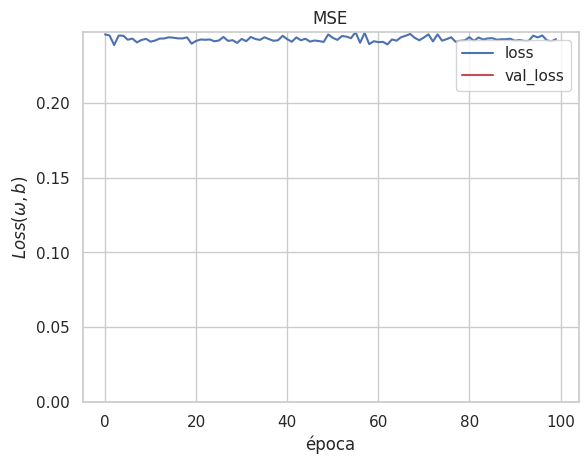

In [109]:
plt.plot( historial.epoch, historial.history['loss'],     'b',label='loss')
plt.plot( historial.epoch, historial.history['val_loss'], 'r',label='val_loss')

plt.title(u'MSE')
plt.xlabel(u'época')
plt.ylabel(r'$Loss(\omega, b)$')
plt.legend(loc='upper right')
plt.grid(True)
plt.ylim([0, np.max(historial.history['loss'])])
plt.show()

In [115]:
for lr in [0.0001, 0.001, 0.01, 0.1]:
    for epochs in [100]:
        model =Sequential( name="aguadebano")
        model.add( Dense( 1000, name = 'layer1', activation = 'relu', input_shape = (X.shape[1],)))
        model.add( Dense( 4000, name = 'layer2', activation = 'relu'))
        model.add( Dense( 1 , activation='sigmoid', name='output' ) )
        opt = keras.optimizers.Adam( learning_rate = lr )
        model.compile( optimizer = opt, loss = 'mean_squared_error')
        historial = model.fit( X_train, y_train, validation_split = 0.2, epochs = epochs, verbose = 0 )
        print(lr,',',epochs,') ',  historial.history['loss'][-1], historial.history['val_loss'][-1] )

0.0001 , 100 )  0.02059161476790905 0.25486817955970764


KeyboardInterrupt: ignored

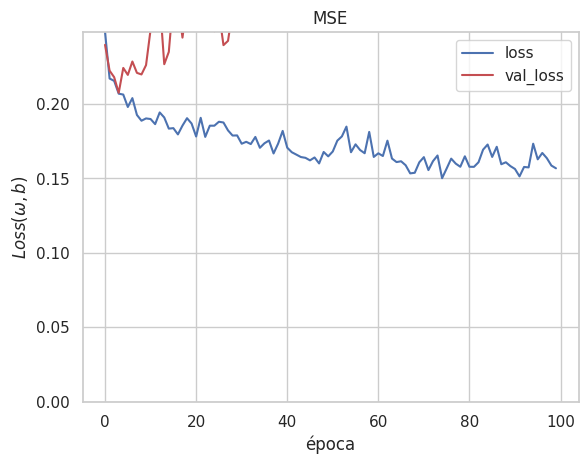

In [111]:
plt.plot( historial.epoch, historial.history['loss'],     'b',label='loss')
plt.plot( historial.epoch, historial.history['val_loss'], 'r',label='val_loss')

plt.title(u'MSE')
plt.xlabel(u'época')
plt.ylabel(r'$Loss(\omega, b)$')
plt.legend(loc='upper right')
plt.grid(True)
plt.ylim([0, np.max(historial.history['loss'])])
plt.show()